In [1]:
# YOLOv8 ve diğer bağımlılıkları kur
!pip install ultralytics  # YOLOv8 için gerekli kütüphane
!pip install opencv-python-headless  # Görüntü işleme için OpenCV


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 28.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

# YOLOv8 modelini yükle
model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 78.4MB/s]


In [3]:
# Modeli eğitme
model.train(
    task='detect',  # Eğitim için detect (tahmin) görevi seçilir
    data="/kaggle/input/coco-for-yolov8/data.yaml",  # Eğitim verisi yolu
    epochs=10,  # Eğitim süresi
    batch=32,  # Batch boyutu
    lr0=0.001,  # Öğrenme oranı
    imgsz=640,
    verbose=True,  # Eğitim sırasında detaylı çıktı al
    optimizer='SGD',  # Optimizasyon algoritması
    patience=5,
    freeze=5,
    augment=True
   
    
)

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/coco-for-yolov8/data.yaml, epochs=10, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=5, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 52.2MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 5.35M/5.35M [00:00<00:00, 143MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/coco-for-yolov8/train/labels... 83629 images, 725 backgrounds, 0 corrupt: 100%|██████████| 83629/83629 [06:24<00:00, 217.31it/s]

train: WARNING ⚠️ /kaggle/input/coco-for-yolov8/train/images/000000099844_jpg.rf.3e1405ef060098b9427ec47378d018c0.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/coco-for-yolov8/train/images/000000201706_jpg.rf.56efa5f04c9eb713f44e70fea4a345b4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/coco-for-yolov8/train/images/000000214087_jpg.rf.1c5470591f2b98ae9c0fc2e5b2eb4dc0.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/coco-for-yolov8/train/images/000000522365_jpg.rf.2e59014564763c03dd30a0a5666aae38.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/coco-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/coco-for-yolov8/valid/labels... 22488 images, 203 backgrounds, 0 corrupt: 100%|██████████| 22488/22488 [01:32<00:00, 243.82it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/coco-for-yolov8/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.48G     0.9036      2.002      1.074        161        640: 100%|██████████| 2614/2614 [33:50<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:42<00:00,  1.03it/s]


                   all      22488     163204      0.766      0.615      0.671      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.47G     0.8881     0.8876      1.065         52        640: 100%|██████████| 2614/2614 [33:36<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:39<00:00,  1.04it/s]


                   all      22488     163204      0.765      0.636      0.693      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.55G     0.8946     0.8687      1.067         76        640: 100%|██████████| 2614/2614 [33:20<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:39<00:00,  1.04it/s]


                   all      22488     163204      0.748      0.625      0.687      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.72G     0.9077     0.8846      1.077         48        640: 100%|██████████| 2614/2614 [33:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:38<00:00,  1.04it/s]


                   all      22488     163204      0.743       0.63       0.69       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.62G     0.9024     0.8585      1.072        107        640: 100%|██████████| 2614/2614 [33:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:38<00:00,  1.04it/s]


                   all      22488     163204      0.736      0.635      0.694      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.66G     0.8939     0.8316      1.067         86        640: 100%|██████████| 2614/2614 [33:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:40<00:00,  1.03it/s]


                   all      22488     163204      0.747      0.636      0.698      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       7.5G     0.8835     0.8073      1.059         96        640: 100%|██████████| 2614/2614 [33:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:38<00:00,  1.04it/s]


                   all      22488     163204      0.749       0.64      0.702      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.17G     0.8745     0.7824      1.054         98        640: 100%|██████████| 2614/2614 [33:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:37<00:00,  1.04it/s]


                   all      22488     163204      0.752      0.643      0.704      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.51G     0.8664     0.7599      1.049        153        640: 100%|██████████| 2614/2614 [33:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:38<00:00,  1.04it/s]


                   all      22488     163204      0.747      0.645      0.706      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.72G     0.8583     0.7419      1.048        105        640: 100%|██████████| 2614/2614 [33:18<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [05:40<00:00,  1.04it/s]


                   all      22488     163204      0.744       0.65      0.707      0.536

10 epochs completed in 6.523 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 352/352 [10:51<00:00,  1.85s/it]


                   all      22488     163204      0.751      0.644       0.71      0.542
              airplane        489        804      0.879      0.837      0.904      0.746
                 apple        326       1172      0.574      0.477      0.502      0.391
              backpack       1002       1606      0.681      0.331      0.437      0.269
                banana        470       2039      0.671      0.454      0.531      0.369
          baseball bat        466        636      0.739      0.709      0.726      0.495
        baseball glove        485        705      0.812      0.643      0.716      0.473
                  bear        198        291      0.918      0.919      0.929      0.825
                   bed        713        789      0.796      0.796      0.856      0.719
                 bench       1066       1961      0.713      0.421      0.517      0.378
               bicycle        610       1255      0.755      0.558      0.664      0.446
                  bir

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca08ae6c310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

In [4]:
metrics = model.val()
print(metrics) 

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /kaggle/input/coco-for-yolov8/valid/labels... 22488 images, 203 backgrounds, 0 corrupt: 100%|██████████| 22488/22488 [00:44<00:00, 508.72it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/coco-for-yolov8/valid is not writeable, cache not saved.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 703/703 [20:47<00:00,  1.77s/it]


                   all      22488     163204      0.752      0.645       0.71      0.542
              airplane        489        804      0.878      0.837      0.904      0.747
                 apple        326       1172      0.573      0.477      0.502       0.39
              backpack       1002       1606      0.682      0.331      0.437      0.269
                banana        470       2039      0.669      0.453      0.531       0.37
          baseball bat        466        636      0.741      0.711      0.727      0.496
        baseball glove        485        705      0.815      0.641      0.718      0.475
                  bear        198        291      0.919      0.918      0.929      0.825
                   bed        713        789      0.796      0.796      0.856       0.72
                 bench       1066       1961      0.714      0.422      0.517      0.378
               bicycle        610       1255      0.756      0.558      0.666      0.447
                  bir

In [5]:
model.export(format='tflite')

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 213.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 290.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 57.3MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 48.47file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.45...
ONNX: export success ✅ 3.2s, saved as 'runs/detect/train/weights/best.onnx' (99.1 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success ✅ 199.0s, saved as 'runs/detect/train/weights/best_saved_model' (248.4 MB)

TensorFlow Lite: starting export with tensorflow 2.17.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/train/weights/best_saved_model/best_float32.tflite' (99.0 MB)

Export complete (201.6s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/coco-for-yolov8/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best_saved_model/best_float32.tflite'

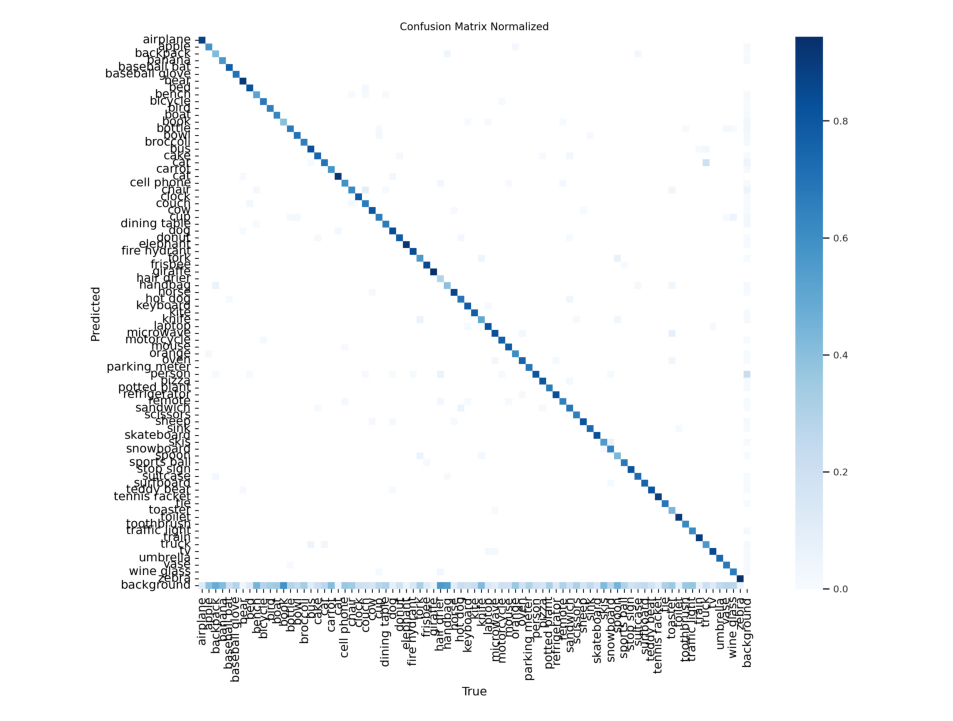

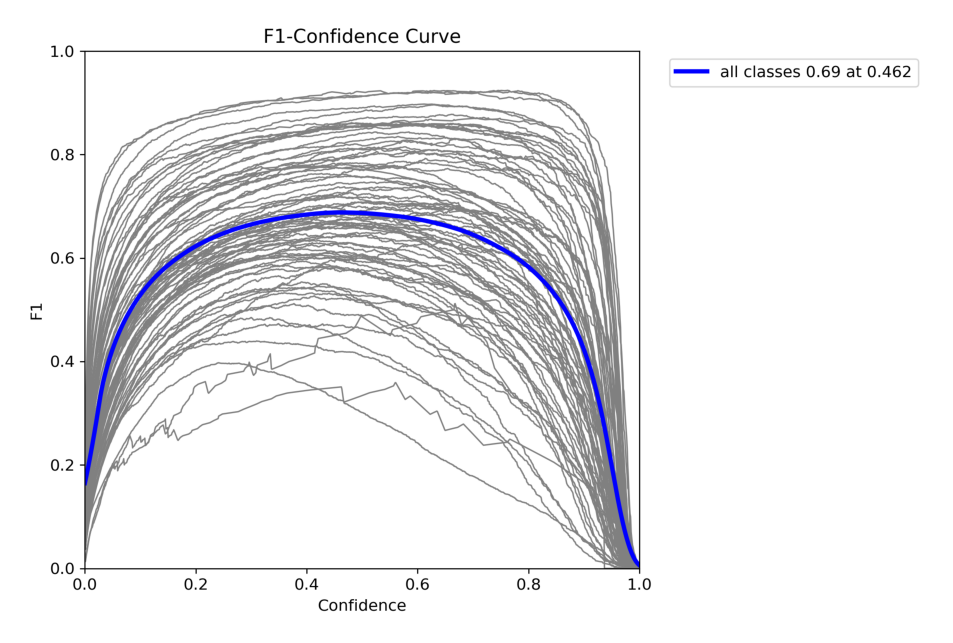

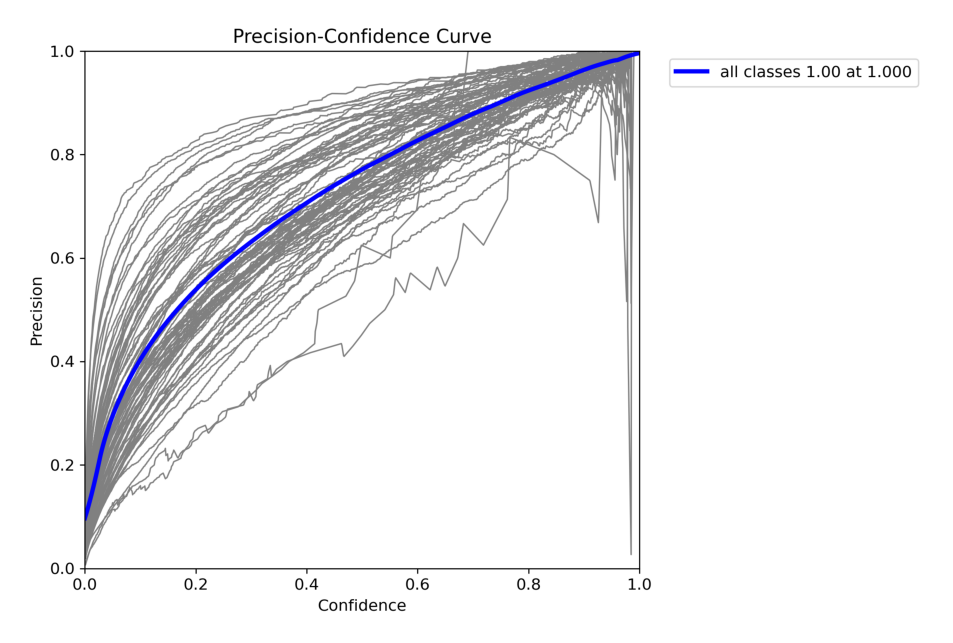

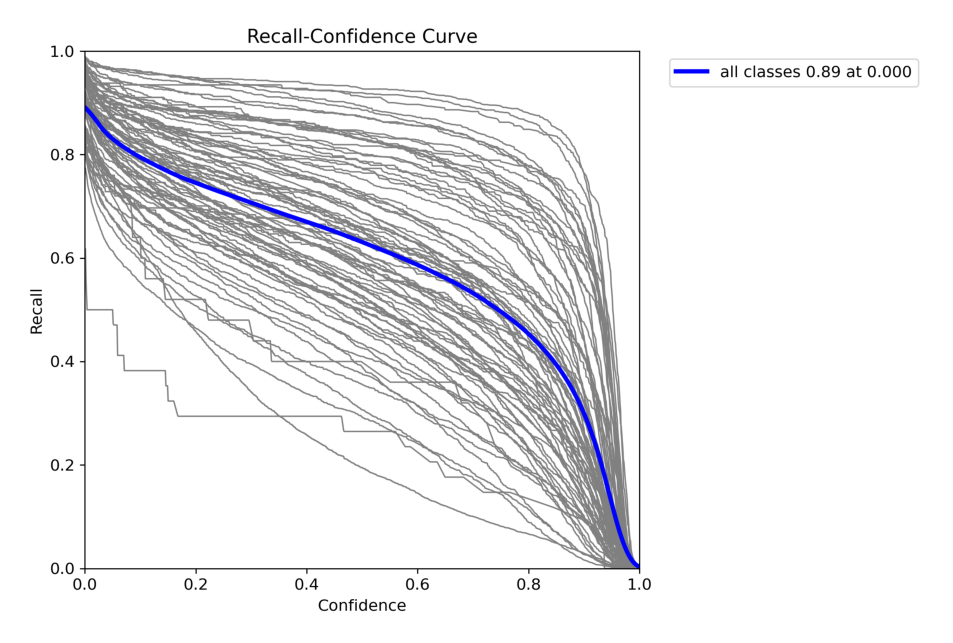

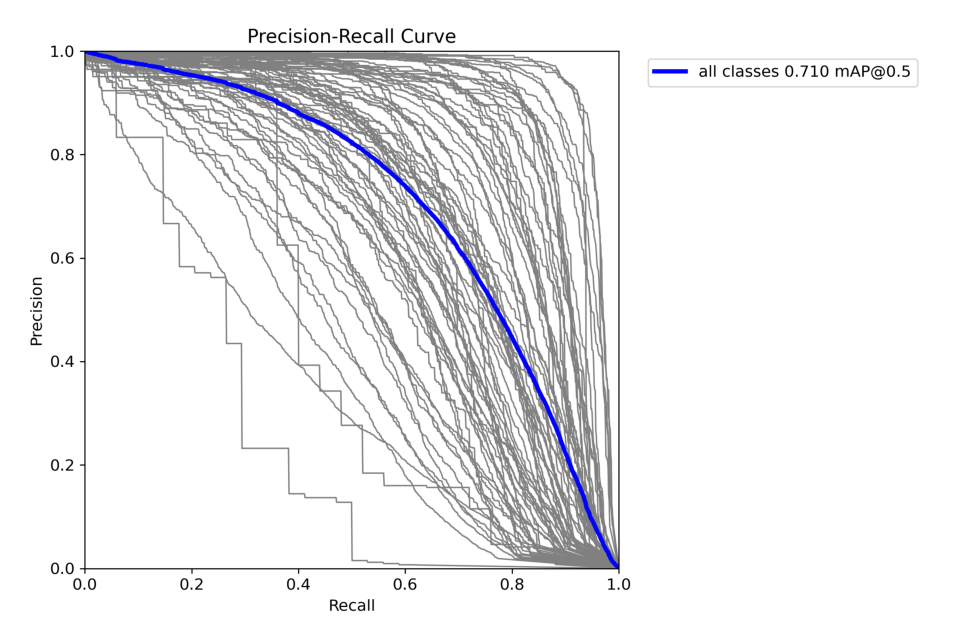

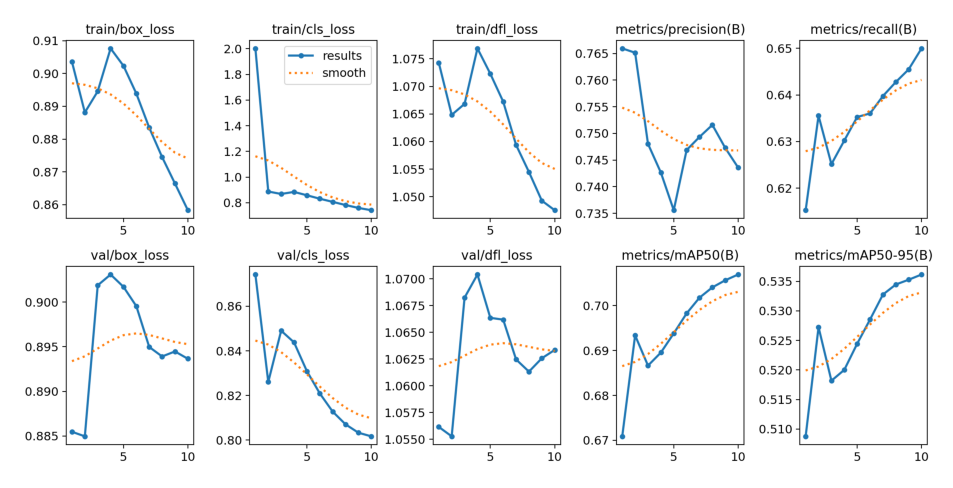

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

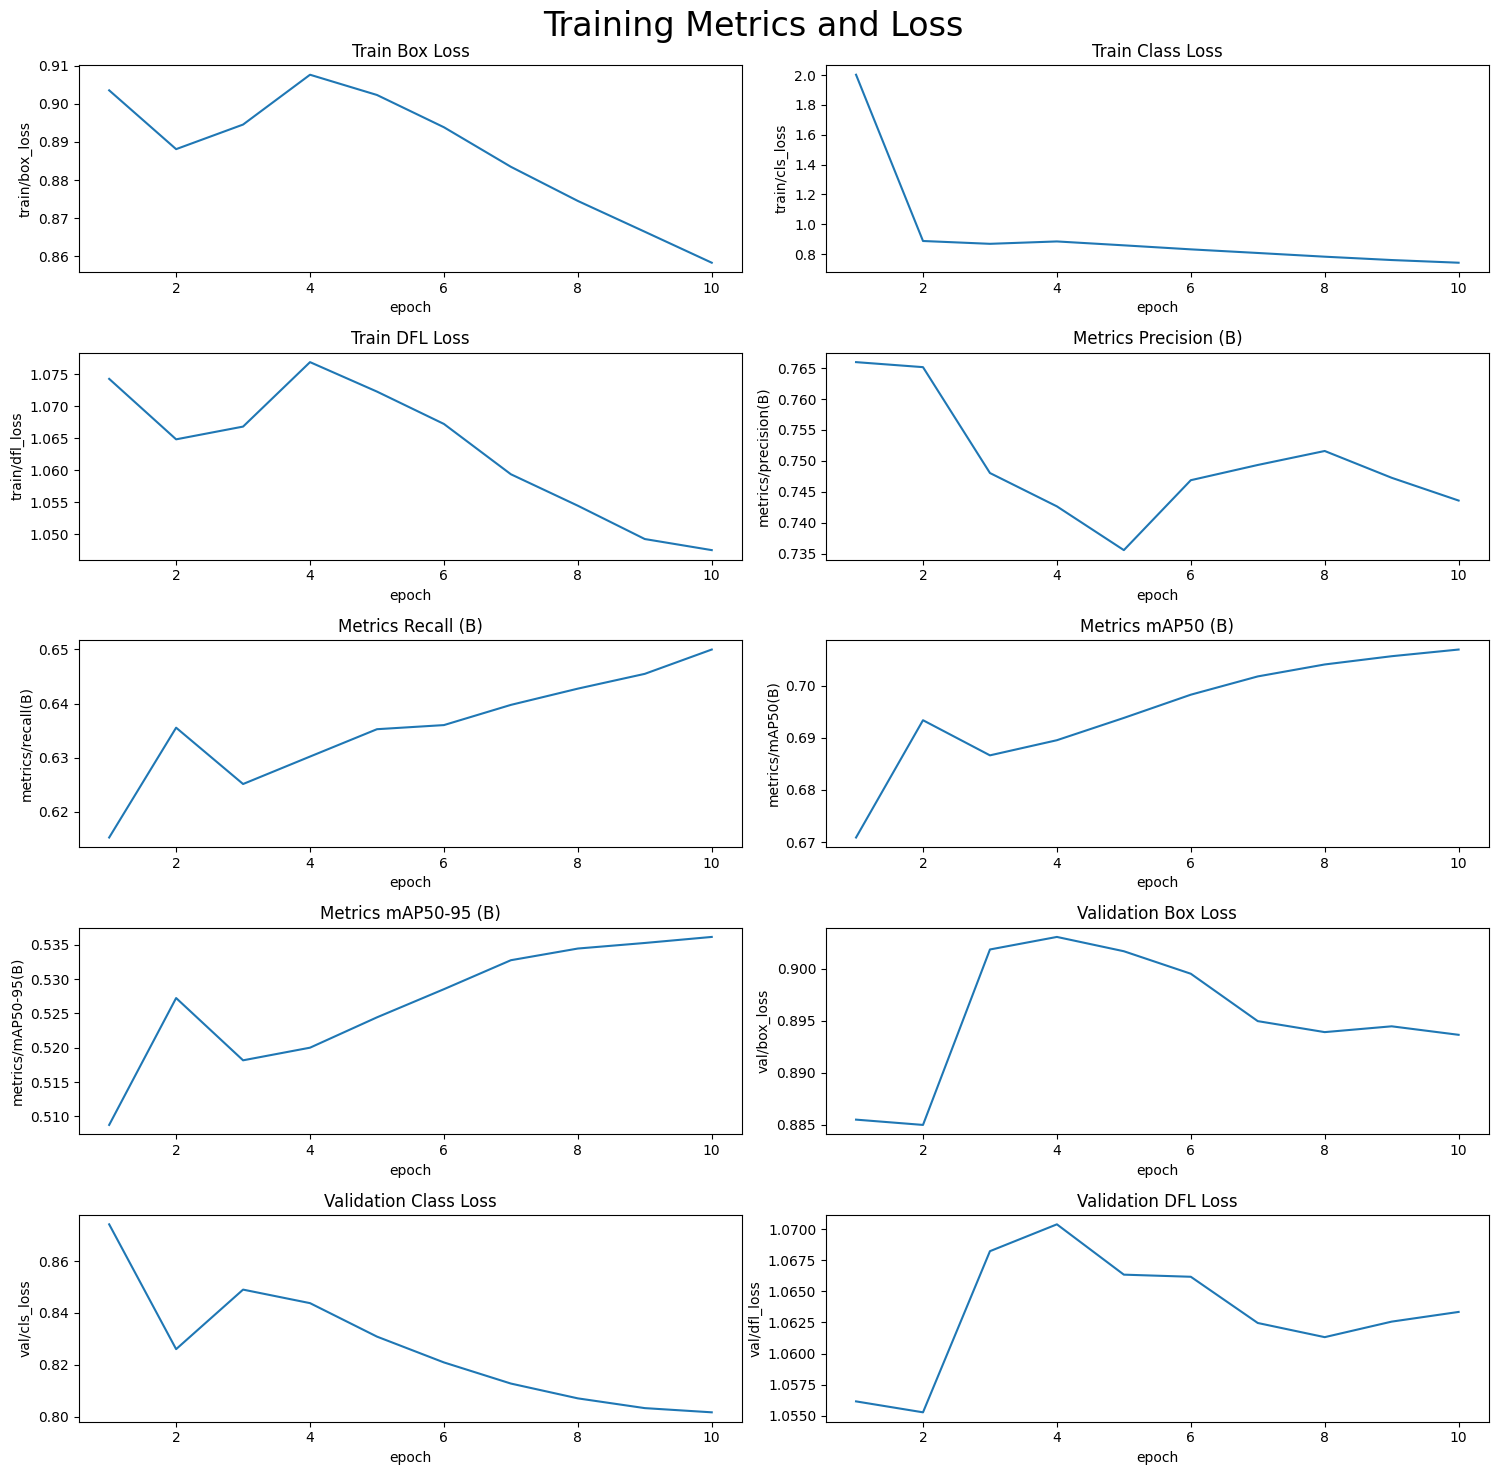

In [7]:
import pandas as pd
import seaborn as sns


result_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
# Read the results.csv file as a pandas dataframe
result_model.columns = result_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=result_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=result_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=result_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=result_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=result_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=result_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=result_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=result_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=result_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=result_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()